# Creating ML model to detect the spam message using Naive Bayes Algorithm

In [17]:
#importing necessary modules
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

#For removing the warning message
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Gathering the data and loading
df=pd.read_csv("spam.csv",encoding='latin-1')

In [6]:
df.head()  #to display the first 5 rows of the dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning
### There are columns which is unlabeled and need to drop, then need to rename column name v1 and v2

In [7]:
#renaming the columns
df.rename(columns={'v1':'Class','v2':'Message'},inplace=True)


In [8]:
df.head()

,Class,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
#Removing the columns: Unnamed:2, Unnamed:3, Unnamed:4
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)


In [10]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# display information of columns like no: of values, data types and is there any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


From the above information its clear that there are no null values and the datatype is object.


## Exploratory Data Analysis

In [12]:
# Display the describtion of the data
df.describe()

,Class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
#Checking for null using isnull()
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [15]:
# Checking t=for the count of spam and ham in class
df['Class'].value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

<AxesSubplot:>

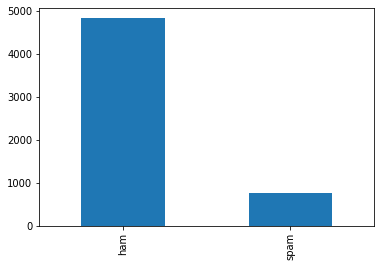

In [16]:
df['Class'].value_counts().plot(kind='bar')

In [22]:
df['Message'].duplicated().sum()

403

There are 403 duplicate messages, so we need to remove it.

In [24]:
df.drop_duplicates()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91963\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Data Preprocessing

1. Converting to lowercase for easy processing
2. Tokenisation for splitting the words.
3. Removing special characters,stopwords, punctuation.
4. Stemming- It find the root words.|

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
from nltk.tokenize import word_tokenize
def text_transform(message):
    message=message.lower() #change to lowercase
    #creating list of words including the punctuations using word_tokenize
    message=nltk.word_tokenize(message)
    
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91963\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
df['transformed_msg']=df['Message'].apply(text_transform)

In [35]:
df.head()

,Class,Message,transformed_msg
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,ham,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though


In [41]:
#transform the values of the output variable into 0 and 1
df['Class'].replace({'ham':0,'spam':1},inplace=True)

In [80]:
df.head(20)

,Class,Message,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",nah n't think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 's 3 week 's word back 'd lik...
6,0,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,per request 'mell mell oru minnaminungint nuru...
8,1,WINNER!! As a valued network customer you have...,winner valu network custom select receivea å£9...
9,1,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...


In [44]:
df['Class'].value_counts()

0    4825
1     747
Name: Class, dtype: int64

This dataset is imbalanced data.

## Buliding a model using Navel Bayes
Here input is categorical and output is numerical
So we need to convert(Vectorize) to numerical, as machine accpets numerical values.

### There are several vectorization method.
Lets use TFIDVectorizer- generate word frequency which is good for word classification.

In [43]:
# Feature Selection and vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['Class'].values

#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Types of Naive Bayes Classifier:
1. Bernoulli NB
2. Multinomial NB
3. Gaussian NB

We can use anyone, but Multinomial is good as it predicts the frequency of words.

The multinomial NB classifier has a hyperparameter called alpha. It is the smoothing parameter to avoid zero counts when calculating the frequencies.

In [50]:
#Generating different alpha values 
#Implement the model
#And find alpha with best accuracy score 

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#train and evaluate models with different alpha values
alpha_values = np.arange(0.01, 10, 0.01)
accuracy_scores, confusion_matrix, precision_scores = [], [], []

#Train the model and evaluate it using different metrics.
for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, NB.predict(X_test)))
    recall_scores.append(recall_score(y_test, NB.predict(X_test)))
    precision_scores.append(precision_score(y_test, NB.predict(X_test)))
    
performance_NB = pd.DataFrame(columns=['alpha', 'accuracy', 'recall', 'precision'])
performance_NB['alpha'] = alpha_values
performance_NB['accuracy'] = accuracy_scores
performance_NB['recall'] = recall_scores
performance_NB['precision'] = precision_scores
performance_NB

,alpha,accuracy,recall,precision
0,0.01,0.978475,0.860759,0.985507
1,0.02,0.979372,0.867089,0.985612
2,0.03,0.979372,0.867089,0.985612
3,0.04,0.980269,0.867089,0.992754
4,0.05,0.980269,0.867089,0.992754
...,...,...,...,...
994,9.95,0.862780,0.031646,1.000000
995,9.96,0.862780,0.031646,1.000000
996,9.97,0.862780,0.031646,1.000000
997,9.98,0.862780,0.031646,1.000000


In [73]:
#finds the best alpha value
best_index = performance_NB['precision'].idxmax()
performance_NB.iloc[best_index, :]

alpha        1.060000
accuracy     0.969507
recall       0.784810
precision    1.000000
Name: 105, dtype: float64

Accuracy score and precision score is high when alpha=1.06

Accuracy Score: 0.9695067264573991
Recall_score: 0.7848101265822784
Precision_score: 1.0
Confusion_matrix: [[957   0]
 [ 34 124]]
Confusion matrix heatmap


[Text(0.5, 1.0, 'Confusion matrix'),
 Text(0.5, 15.0, 'actual'),
 Text(33.0, 0.5, 'Predicted')]

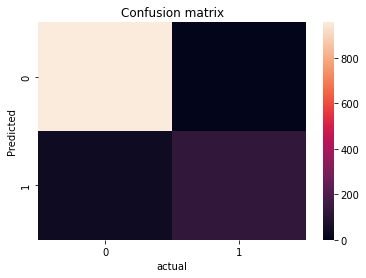

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

MNB=MultinomialNB(alpha=1.06)
MNB.fit(X_train,y_train)
print("Accuracy Score:",accuracy_score(y_test, MNB.predict(X_test)))
print("Recall_score:",recall_score(y_test, MNB.predict(X_test)))
print("Precision_score:",precision_score(y_test, MNB.predict(X_test)))
print("Confusion_matrix:",confusion_matrix(y_test,MNB.predict(X_test)))
print("Confusion matrix heatmap")
sns.heatmap(confusion_matrix(y_test,MNB.predict(X_test))).set(title="Confusion matrix",xlabel="actual",ylabel="Predicted")


## Here the precision comes out to be almost 1 which proves good model as there will be very less "False Positive"

In [82]:
# Deployment

user_msg=input("Enter a message:")
if(len(user_msg)<1):
    print("Please enter some text message")
else:
    data=tfidf.transform([user_msg]).toarray()
    classify=MNB.predict(data)
    if(classify[0]==1):
        print("Spam")
    else:
        print("Not spam")
    

Enter a message:urgent click to get free 
Spam
